# Introduction :

### We have the dataset called "Aadhar Card Enrollement"

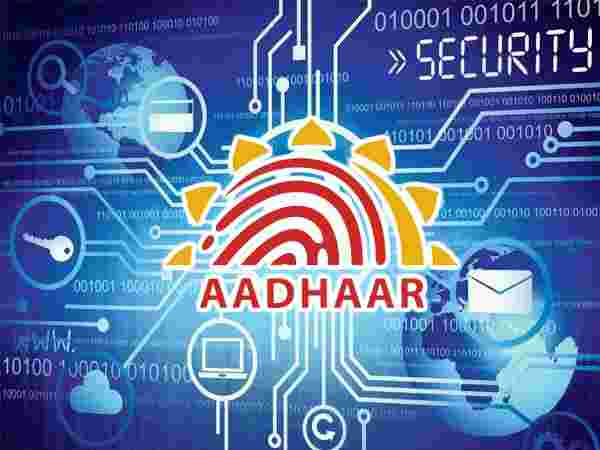



*   Analyzing a dataset from Aadhaar – a unique identity issued to all resident Indians.

Issuing Authority:



*   The issuing authority – UIDAI provides a catalog of downloadable datasets collected at the national level.

Dataset Study:--



Summary of the dataset is having the status of Male and Female for each state wheather the enrollment is successfully passed or not.


1.   Registrar  -- Which registrar office used for application
2.   Enrolment Agency --- Which Enrolment Agency used for application
3.   State  --- Which state of the application 
4.   District  --- Which district of state
5.   Sub District  --- Which sub district of state
6.   Pin Code   ---  What is pincode of state
7.   Gender --- Gender type Male, Female, Transgender
8.   Age  -- Age of a person
9.   Aadhaar generated  --- Yes(1) or No(0 )for aadhar 
10.  Enrolment Rejected  --- Rejected (1) or Accepted(0) for aadhar
11.  Residents providing email   --- Email provided (0) or not(1)
12.  Residents providing mobile number  --- Mobile number provided(1) or not(0)


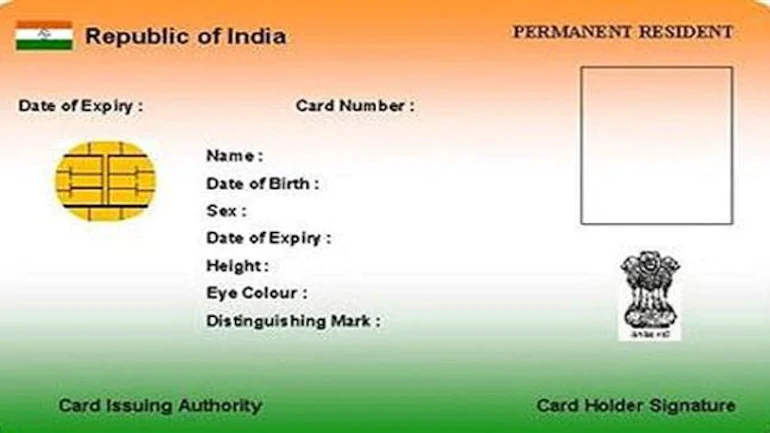
  

*   ---> We can understand the data and find the several outcomes like which state is having more rejections, more acceptance.
*   ---> Which agency is most used by states.
*   ---> Which state is completely under full detailed aadhar authentication.






In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 51.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=c5f980be06b8ed979ba3543be7766e84b223a116b04dfe3246ea4fd187efcd51
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
#Initializing PySpark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext


# #Spark Config
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
from pyspark.sql.functions import sum, col, desc, asc, count

# Reading the Data Frame

In [ ]:
df = spark.read.csv('/content/UIDAI-ENR-DETAIL-20170308.csv', header=True,inferSchema='True')

In [ ]:
df.show(2)
#to see hte dataframe with top 2 rows

+--------------+--------------------+-------------+---------+------------+--------+------+---+-----------------+------------------+-------------------------+---------------------------------+
|     Registrar|    Enrolment Agency|        State| District|Sub District|Pin Code|Gender|Age|Aadhaar generated|Enrolment Rejected|Residents providing email|Residents providing mobile number|
+--------------+--------------------+-------------+---------+------------+--------+------+---+-----------------+------------------+-------------------------+---------------------------------+
|Allahabad Bank|A-Onerealtors Pvt...|Uttar Pradesh|Allahabad|        Meja|  212303|     F|  7|                1|                 0|                        0|                                1|
|Allahabad Bank|Asha Security Gua...|Uttar Pradesh|Sonbhadra| Robertsganj|  231213|     M|  8|                1|                 0|                        0|                                0|
+--------------+--------------------+---

In the dataframe, we have to do the renaming of the coloumn names to have clear understanding

# Renaming the Coloumn Names

In [ ]:
from pyspark.sql import functions as F

aadhar = df.select([F.col(col).alias(col.replace(' ', '_')) for col in df.columns])

#Replacing space with _ to read the schema well.

Imported the pysparksql as function F, and used select statement and repalce function. Space " " with "_"
,Assigned data as "aadhar"

In [ ]:
aadhar.show(4,truncate=False)

+--------------+-----------------------------------+-------------+---------+------------+--------+------+---+-----------------+------------------+-------------------------+---------------------------------+
|Registrar     |Enrolment_Agency                   |State        |District |Sub_District|Pin_Code|Gender|Age|Aadhaar_generated|Enrolment_Rejected|Residents_providing_email|Residents_providing_mobile_number|
+--------------+-----------------------------------+-------------+---------+------------+--------+------+---+-----------------+------------------+-------------------------+---------------------------------+
|Allahabad Bank|A-Onerealtors Pvt Ltd              |Uttar Pradesh|Allahabad|Meja        |212303  |F     |7  |1                |0                 |0                        |1                                |
|Allahabad Bank|Asha Security Guard Services       |Uttar Pradesh|Sonbhadra|Robertsganj |231213  |M     |8  |1                |0                 |0                        |

# DataFrame Shape 

Before starting the analysis , we need to understand the dataset size in terms of number of rows and coloumns

In [ ]:
row = aadhar.count()
# Total number of rows

column = len(aadhar.columns)
# Total number of columns

print(f'Numbe of rows in Dataframe: {row}') #printing

print(f'Numbe of columns in Dataframe: {column}') #printing

print(f'Dataframe Shape: {(row,column)}') #printing


Numbe of rows in Dataframe: 440818
Numbe of columns in Dataframe: 12
Dataframe Shape: (440818, 12)


### We can see that aadhar dataframe has total 12 rows with 4,40,818 coloumns

# DataFrame Schema

In [ ]:
aadhar.printSchema()

root
 |-- Registrar: string (nullable = true)
 |-- Enrolment_Agency: string (nullable = true)
 |-- State: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Sub_District: string (nullable = true)
 |-- Pin_Code: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Aadhaar_generated: integer (nullable = true)
 |-- Enrolment_Rejected: integer (nullable = true)
 |-- Residents_providing_email: integer (nullable = true)
 |-- Residents_providing_mobile_number: integer (nullable = true)



Schema shows the each feature Datatype along with null values status, We have no null values found. 

# 1. Create a dataframe with Total Aadhaar's generated for each state



In [ ]:
state_aadhar = aadhar.groupBy("State")\
  .agg(sum("Aadhaar_generated").alias("sum_aadhar"))\
  .sort(desc("sum_aadhar"))


# Grouping statewise data
# Summing all aadhar generated 
# Arranging dataframe in Descending order

In [ ]:
state_aadhar.show(10,truncate=False);

# It will display the last 10 rows of States for Aadhar generated

+--------------+----------+
|State         |sum_aadhar|
+--------------+----------+
|Bihar         |162607    |
|West Bengal   |119901    |
|Uttar Pradesh |103767    |
|Madhya Pradesh|53276     |
|Rajasthan     |39570     |
|Gujarat       |34844     |
|Tamil Nadu    |32485     |
|Maharashtra   |26085     |
|Karnataka     |19764     |
|Odisha        |18182     |
+--------------+----------+
only showing top 10 rows



## Interpretation : 
We can see the all states are now having count with Aadhar generation. 


1.   Top state with more aadhars are Bihar with 1,62,607.
2.   Followed by we have West bengal and Uttar Pradesh



# 2. Create a dataframe with the Total Aadhaar's generated by each enrollment agency

In [ ]:
enroll_agency =aadhar.groupBy("Enrolment_Agency")\
.agg(sum("Aadhaar_generated").alias("sum_aadhar"))\
.sort(desc("sum_aadhar"))

# Grouping enrollment agency wise data
# Summing all aadhar generated  and named as sum aadhar (to deal with ambiguity)
# Arranging dataframe in Descending order


In [ ]:
enroll_agency.show(10,truncate=False);

# It will display the last 10 rows of Enrollment Agency names for Aadhar generated

+----------------------------------------+----------+
|Enrolment_Agency                        |sum_aadhar|
+----------------------------------------+----------+
|CSC SPV                                 |173192    |
|Wipro Ltd                               |39619     |
|SREI INFRASTRUCTURE FINANCES L          |26497     |
|SRM Education And Social Welfare Society|26253     |
|Computer LAB                            |21823     |
|Rajcomp Info Services Ltd               |20163     |
|MPOnline Limited                        |17020     |
|AKSH OPTIFIBRE LIMITED                  |16624     |
|Nielsen  India  Private Limited         |15993     |
|TAMILNADU ARASU CABLE TV CORPORATION LTD|15981     |
+----------------------------------------+----------+
only showing top 10 rows



## Interpretation :



*   Indian Government is using CSC SPV agency with 1,73,192 as top category for aadhar generation. 
*   Government needs to push this service to other states also as it was giving good outcome.



# 3. Create dataframe with the top 10 districts with maximum Aadhaar's generated for both Male and females?

In [ ]:
male_max_aadhar =aadhar.filter("Gender == 'M'")\
    .groupBy("District")\
    .agg(sum("Aadhaar_generated").alias("sum_aadhar"))\
    .sort(desc("sum_aadhar"))


# Filtering data based on Gender = Male
# Grouping statewise data
# Summation of all aadhar generated and named as sum aadhar (to deal with ambiguity)
# Arranging dataframe in descending order

female_max_aadhar =aadhar.filter("Gender == 'F'")\
    .groupBy("District")\
    .agg(sum("Aadhaar_generated").alias("sum_aadhar"))\
    .sort(desc("sum_aadhar"))

# Filtering data based on Gender = Female
# Grouping statewise data
# Summation of all aadhar generated and named as sum aadhar (to deal with ambiguity)
# Arranging dataframe in descending order

In [ ]:
print('Top 10 districts belongs to "Male" for genrating Maximum aadhar cards :')
male_max_aadhar.show(10,truncate=False);


 # It will display the top 10 rows of district names with Male categoty for Aadhar generated. 

print('Top 10 districts belongs to "Female" for genrating Maximum aadhar cards :')
female_max_aadhar.show(10,truncate=False);

# It will display the top 10 rows of district names with Female categoty for Aadhar generated. 

Top 10 districts belongs to "Male" for genrating Maximum aadhar cards :
+-----------------+----------+
|District         |sum_aadhar|
+-----------------+----------+
|Bhagalpur        |11007     |
|South 24 Parganas|7825      |
|Katihar          |6968      |
|Murshidabad      |6808      |
|Samastipur       |6195      |
|Patna            |6191      |
|Barddhaman       |6077      |
|Gaya             |5959      |
|Munger           |5781      |
|Nadia            |5509      |
+-----------------+----------+
only showing top 10 rows

Top 10 districts belongs to "Female" for genrating Maximum aadhar cards :
+-----------------+----------+
|District         |sum_aadhar|
+-----------------+----------+
|Barddhaman       |9744      |
|South 24 Parganas|8382      |
|North 24 Parganas|6108      |
|Gaya             |4796      |
|Jalpaiguri       |4428      |
|Paschim Medinipur|3965      |
|Howrah           |3516      |
|Bhagalpur        |3472      |
|Budaun           |2905      |
|Banka            |288

## Interpretation :

Male 



*   Top 1 district with male is Bhagalpur with 11,007 records of aadhar generation.
*   Followed by we have South 24 Parganas and Katihar.

Female


*   Top 1 district with male is Barddhaman with 9744 records of aadhar generation.
*    Followed by we have South 24 Parganas and North 24 Parganas.





# 4. Create a dataframe with Total Aadhaar generated for the top 10 least states

In [ ]:
least_aadhar_state = aadhar.groupBy("State") \
    .agg(sum("Aadhaar_generated").alias("sum_aadhar")) \
    .sort(asc("sum_aadhar"))

# Grouping state wise data
# Summation of all aadhar generated  and named as sum aadhar (to deal with ambiguity)
# Arranging dataframe in Acending order to get least values


In [ ]:
print('Top 10 states generated with least aadhar cards :')
least_aadhar_state.show(10,truncate=False);


 # It will display the top 10 rows of district names with Male categoty for Aadhar generated. 

Top 10 states generated with least aadhar cards :
+---------------------------+----------+
|State                      |sum_aadhar|
+---------------------------+----------+
|Lakshadweep                |4         |
|Andaman and Nicobar Islands|5         |
|Others                     |12        |
|Sikkim                     |50        |
|Puducherry                 |83        |
|Daman and Diu              |105       |
|Dadra and Nagar Haveli     |140       |
|Chandigarh                 |259       |
|Meghalaya                  |277       |
|Nagaland                   |545       |
+---------------------------+----------+
only showing top 10 rows



## Interpretation :


*   Least state for aadhar generation is "Lakshadeep" as it is having population 64,430 (2011) as per this very poor in handling data enrolling in Lakshadeep.
*   Similarly Government needs to put more strategies to improve on this leaset 10 states for aadhar enrolment, otherwise it leads to below.


1.  Technical errors
2.  Improper verification
3.  Incorrect information
4.  Loss of encryption





# 5. For which age, most Aadhar cards have declined?

In [ ]:
aadhar_decl_age = aadhar.filter(col("Aadhaar_generated") == 0) \
    .groupBy("Age") \
    .agg(count("Aadhaar_generated").alias("count_aadhar")) \
    .sort(desc("count_aadhar"))

# Filtering Data based on aadhar generation
# Grouping state wise data
# Counting of all aadhar generated  and named as sum aadhar (to deal with ambiguity)
# Arranging dataframe in Decending order to get highest values

In [ ]:
print('Age show most decline in Aadhar card Generation ')
aadhar_decl_age.show(10,truncate=False)


 # It will display the top 10 rows of Rows of Ages with count of aadhar generated

Age show most decline in Aadhar card Generation 
+---+------------+
|Age|count_aadhar|
+---+------------+
|4  |1729        |
|3  |1492        |
|2  |1389        |
|1  |1294        |
|0  |1087        |
|5  |863         |
|6  |794         |
|7  |724         |
|8  |612         |
|9  |529         |
+---+------------+
only showing top 10 rows



## Interpretation :  

From this we can say  Age is 0-10 having most decline / rejections for aadhar enrolement.

Government needs to understand the reasons for reejctions and put some action place.

Reasons might be as below, 


*   Due to No proper detection of Biometric
*   No proper photograph of child
*   No other strong systems at place to detect finger prints.

Options: 


1.   Implementation of special machines for child fingerpint capturing.
2.   Auto scanning face of child with multiple images.



